<div align="middle">
  <h1><b><i>تمرین سوم</i></b></h1>
 </div>




<div align="right" dir="auto">
    
   #  بخش اول:  هدوپ 

    ۱- به سوالات زیر پاسخ دهید
    - مفهوم replication جیست
    - مفهوم block در HDFS چیست و اگر بلاک‌ها را بسیار کوچک درنظر بگیریم چه مشکلی پیش می‌آید
    
</div>
  
    

<div align="right" dir="auto" > 
    
# پاسخ سوال ۱
    replication : 
    به این معناست که ما داده ورودی را به بخش های مختلفی تقسیم میکنیم که بر هر یک از این بخش ها repliaca میگویند 
    سپس پردازش ها را جدا جدا انجام داده و در نهایت ادقام میکنیم
    
    block : درون هر replica تعدادی بلاک وجود دارد که داده ها بلاک بلام خوانده می شوند
    اگر یک بلاک کوچک باشد احتمال miss بالا میرود و در خطاها سرعت بسیار پایین می آید
    

−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−

</div>
    

<div align="right" dir="auto">
   

    ۲- در  این قسمت شما باید ابتدا دیتاست داده شده را از حالت فشرده در بیاورید و سپس فایل‌های درون آن را در کلاستر هدوپ در مسیر /homework3/dataset/ بارگزاری کنید 
    نکته: در این بخش دستورات زده شده خود را برای کار با hdfs  در ترمینال را در سلول زیر وارد نمایید
    برای دسترسی به کامند 'hdfs dfs'  میتوانید وارد یکی از کانتینر‌های هدوپ شوید و دستور را اجرا کنید همچنین همه کانتینر‌ها دارای shared_dir
    در روت خود هستند و این دایرکتوری در تمام کانتینر‌ها به اشتراک گذاشته شده است
    برای چک کردن فایل‌ها در hdfs به 
    
[HDFS webUI](http://localhost:9870/explorer.html#/)
    
    مراجعه کنید
 </div>

# answer
hdfs dfs -mkdir /homework3


hdfs dfs -put /shared_dir/dataset /homework3/

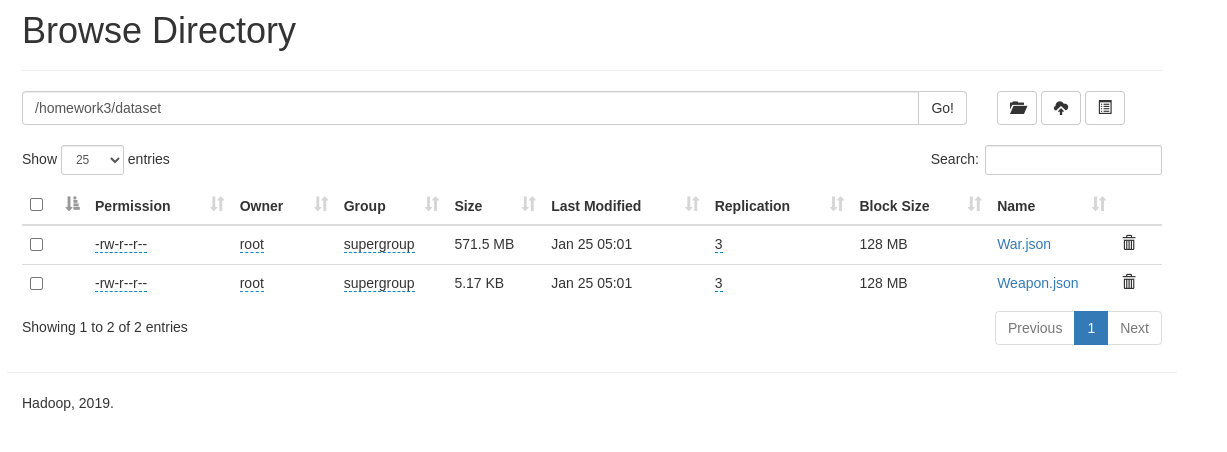

------------------------------------

<div align="right" dir="auto">
    
   #  بخش دوم:  اسپارک 

    ۱- به سوالات زیر پاسخ دهید
    - مزیت اسپارک نسبت به مدل قدیمی map/reduce چیست؟
    -  تفاوت action و transform در اسپارک چیست؟
    
</div>
  
    

    # answer

<div align="right" dir="auto">
    

    ۲- کد‌های خواسته شده در قسمت‌های پایینی را تکمیل کنید
    (قسمت های ToDo )
</div>
  
    


<div align="right" dir="auto">
   
##  اتصال به کلاستر اسپارک و هدوپ 

    در این قسمت از تمرین باید به عنوان درایور یک سسشن  به کلاستر اسپارک بسازیم.
 </div>
  
    

In [1]:
import pyspark
from pyspark import SparkContext 
from pyspark.sql import SparkSession,Row
from pyspark.sql.functions import *
import math
import pandas , numpy
import matplotlib
import pprint
    


In [3]:
spark = SparkSession.builder.appName("homework3").master("spark://spark-master:7077").config("fs.defaultFS","hdfs://namenode:9000/").getOrCreate()
spark


<div align="right" dir="auto">
   
#  خواندن داده 

    :در اسپارک ما ساختارهای مختلفی برای کار با داده و پخش شدن آن‌ها در شبکه داریم که به ۳ دسته تقسیم بندی میشوند 
+ RDD
+ Dataset
+ DataFrame
    
    
     برای مطالعه بیشتر به لینک زیر مراجعه کنید:
[rdd-vs-dataframe-vs-dataset](https://phoenixnap.com/kb/rdd-vs-dataframe-vs-dataset)

    ما در درس با ساختار RDD آشنا شدیم حال در این تمرین میخواهیم با ساختار Dataframe آشنا شویم و به کمک آن دیتا را از روی HDFS بخوانیم و روی آن فایل‌ها پردازش انجام دهیم
 
 </div>
  
    

- [Spark Cluster Master UI](http://localhost:8080/)
- [Application master UI (driver UI)](http://localhost:4040)
- [Web Hdfs](http://localhost:9870/explorer.html#/)


<div align="right" dir="auto">
 .در این قسمت دیتاست را لود می‌کنیم 
</div>

In [ ]:
War = spark.read.json(f"/homework3/dataset/War.json")
Weapon = spark.read.json("/homework3/dataset/Weapon.json")

<div align="right" dir="auto">
برای اینکه بتوانیم روی دیتای لود شده به وسیله تابع  spark.sql
    کوئری‌های SQL بزنیم
    باید دو دیتاست لود شده را به عنوان table
    به spark 
    معرفی کنیم
</div>

In [5]:
War.registerTempTable("War")
Weapon.registerTempTable("Weapon")


<div align="right" dir="auto">
یک مثال ...
</div>

In [6]:
spark.sql("SELECT * FROM War where DurationOfWar=1005.0 limit 1;").show()

+-----------+-------------+--------+-------------+--------------+------------+
|  DateOfWar|DurationOfWar|Location|MinorityStart|TargetMinority|      Weapon|
+-----------+-------------+--------+-------------+--------------+------------+
|73298-04-22|       1005.0|BIEN HOA|          Elf|           Orc|Mirkwood Bow|
+-----------+-------------+--------+-------------+--------------+------------+



In [7]:
War.select("*").filter(col("DurationOfWar")==1005.0).limit(1).show()

+-----------+-------------+------------+-------------+--------------+------------+
|  DateOfWar|DurationOfWar|    Location|MinorityStart|TargetMinority|      Weapon|
+-----------+-------------+------------+-------------+--------------+------------+
|73361-06-05|       1005.0|TAN SON NHUT|          Elf|           Orc|Belthronding|
+-----------+-------------+------------+-------------+--------------+------------+



<div align="right" dir="auto">
 ده رکورد آخر را نمایش دهید
</div>

<div align="right" dir="auto">
اسکیما یا ساختار دیتاست ها را نمایش دهید

</div>

### Expected
![image](expected_answers/1.png)


<div align="right" dir="auto">
   
#  اسپارک SQL 

    مهمترین قابلیت اسپارک این است که می‌تواند با خواندن فایل‌ها به صورت توزیع شده روی آن‌ها پردازش انجام دهد و این پردازش را برنامه ‌نویس میتواند با استفاده از دستورات SQL اعمال کند
    در این بخش از شما انتظار می‌رود که به وسیله spark SQL  به اسپارک کوئری  بزنید . 
    
    
 </div>

[pyspark.sql.functions.col](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.col.html)

[pyspark.sql.DataFrame.count](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.count.html)

[pyspark.sql.DataFrame.filter](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.filter.html)

[pyspark.sql.DataFrame.groupBy](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.groupBy.html)

<div align="right" dir="auto">
 چه تعداد نبرد در کل این دوران‌ها انجام شده است؟
</div>

### Expected
![image](expected_answers/2.png)

<div align="right" dir="auto">
هر نژاد در چه تعدادی نبرد مشارکت داشته اند  به صورت مرتب شده نمایش دهبد؟
</div>

### Expected
![image](expected_answers/3.png)


<div align="right" dir="auto">
   
#  اسپارک toPandas 

    یکی ار قابلیت‌های اسپارک این است که می‌توان dataframe های آن را به 
    dataframe های pandas تبدیل کند و از توابع آن از جمله
    توابع plot  آن برای رسم نمودار استفاده کرد.
    در این قسمت از شما انتظار می‌رود نمودار تعداد جنگ‌ها بر اساس هر گونه را رسم کنید.
    
 </div>
  
    

  
[pyspark.sql.DataFrame.toPandas](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.toPandas.html)

[pyspark.pandas.DataFrame.plot](https://spark.apache.org/docs/3.2.1/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.plot.html)


### Expected
![image](expected_answers/plotlib.png)

<div align="right" dir="auto">
چه تعداد نبردهایی بر اساس زمان انجام شده بر اساس زمان مرتب کنید
</div>

### Expected
![image](expected_answers/date_groupBy.png)

<div align="right" dir="auto">
نژاد "اورک" توسط چه نژادی مورد حمله قرار گرفته است ؟
</div>

### Expected
![image](expected_answers/orc_target.png)


<div align="right" dir="auto">
   
#  اسپارک Shuffle 

    Spark SQL shuffle مکانیزمی است برای توزیع مجدد یا پارتیشن بندی مجدد داده ها به طوری که داده ها به طور متفاوت در پارتیشن ها گروه بندی می شوند، بر اساس اندازه داده شما ممکن است نیاز باشد تعداد پارتیشن های RDD/DataFrame را با استفاده از اسپارک کاهش یا افزایش دهید.
    برای مثال وقتی روی دو dataframe مختلف که روی شبکه توزیع شده اند
    دستور join را میزنیم یک عملیات 
    shuffling انجام میشود
    در این قسمت از شما انتظار می‌رود کوئری جوین زیر را نوشته و اجرا کنید همچنین به  صفحه 
    application master ui
    مراجعه کنید و نحوه shuffleing را گزارش کنید . 
     و همچنین توضیح دهید DAG scheduler  در اسپارک چیست ؟
 </div>
  
    

  
[shuffling in standalone cluster](https://medium.com/@rachit1arora/apache-spark-shuffle-service-there-are-more-than-one-options-c1a8e098230e)



<div align="right" dir="auto">
    
    بیشترین سلاحی که در این جنگ ها استفاده شده کدام سلاح  بوده است؟.
    جزییات این سلاح را از فایل مشخصات سلاح (Weapon) می‌توانید بدست آورید.
    فایل مربوط به سلاح ها را بازخوانی کرده و برای نمایش بین دو فایل از join استفاده شود.

</div>

### Expected
![image](expected_answers/most_used_weapons.png)

     # ToDo
     # Refere to Application master UI


<div align="right" dir="auto">
   
# تابع تعریف شده توسط کاربر(UDF)

    یکی از مزایای اسپارک این است که نه تنها برای ما یک زبان SQL فراهم کرده که روی چندین سرور به صورت همزمان پردازش را انجام دهد بلکه 
    میتوان به زبان‌های مختلف توابعی تعریف کرد که روی  همه executor ها اجرا شود
    در این بخش از شما انتظار می‌رود که با نوشتن یک UDF به زبان پایتونی 
    توضیحات هر اسلحه را به 3 کلمه اول آن کوتاه کنید و بقیه کلمات را حذف کنید و سوتونی به نام short_description را به داده های 
    Weapon اضافه کنید
    
    
 </div>
 
[pyspark.sql.functions.udf](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.functions.udf.html)

[pyspark.sql.DataFrame.withColumn](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.DataFrame.withColumn.html)

    



### Expected
![image](expected_answers/shortener_udf.png)


<div align="right" dir="auto">
   
# نوشتن داده و پارتیشنینگ
    زمانی که میخواهیم داده های حجیم را به صورت فایل هایی ذخیره کنیم  نمیتوانیم همه داده را در یک فایل بزرگ ذخیره کنیم به چند دلیل :
-  ذخیره سازی یک فایل بزرگ باعث ؛تنها نقطه شکست میشود؛ و با حذف آن کل داده از دست میرود
- جستجو در این یک فایل بزرگ که مرتب شده نیست دشوار و عملی نیست
- آپدیت کردن سخت تر میشود
پس تا حدودی حل این میشکل از راه حل های زیر استفاده میکنیم
# پارتیشنینگ: 
-     بر اساس یک فیلد داده هارا دسته بندی میکنیم و در دایرکتوری های مختلف میریزیم این کار را اسپارک برای ما انجام میدهد

    
 </div>
  
    



<div align="right" dir="rtl">

    در این بخش شما باید یک دیتاست کامل بسازید بدین شکل که دیتاست War و Weapon
     را با یکدیگر جوین کنید سپس همه آن رکورد‌هایی که  در توضیحات اسلحه آنها کلمه sword 
    نیامده است را فیلتر کرده و برا اساس گونه شروع کننده جنگ (MinorityStart) پارتیشن کنید
    و روی HDFS
      در مسیر /homework3/<student_number>/output/war_without_sword بنویسید
    و ۲۰ رکورد اول آن را نمایش دهید
    توجه کنید فایل‌های خروجی باید از نوع JSON باشند
    
    
</div>

[pyspark.sql.DataFrameWriter.partitionBy](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrameWriter.partitionBy.html)


### Expected
![war without sword](expected_answers/war_without_sword.png)




<div align="right" dir="rtl">
    
  ### گزارش HDFS
    با مراجعه به HDFS UI
    خروجی پارتیشن شده مسیر بالا را مشاهده میکنید
     -تعداد دایرکتوری‌های ایجاد شده چندتاست و دلیل آن چیست؟ 
    -در هر دایرکتوری ایجاد شده چند فایل JSON میبینید و دلیل تعدد این فایل‌ها چیست؟
    - چگونه میتوان از اسپارک خواست تا از تعدد این فایل‌ها جلوگیری کند و یک فایل در این مسیر‌ها بریزد؟
    - coalesce و repartition  در اسپارک چیستند و کاربر اصلی آنها چیست؟
</div>



    # ToDo

<div align="right" dir="rtl">

   ## coalesce
    همان تسک بالا را انجام دهید  ولی  سعی کنید در هر دایرکتوری پارتیشن شده تنها یک فایل JSON ریخته شود.
    نکته:  در مسیر جدید زیر آن را بنویسید.
    /homework3/<student_number>/output/war_without_sword_v2/
    
    
</div>

[pyspark.sql.DataFrame.coalesce](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.coalesce.html)
